### Preprocessing

In [1]:
import pandas as pd
from IPython.display import display

# Load the datasets
housing_df = pd.read_csv('housing_price_dataset.csv')
# Pretty print the head of the dataframe
display(housing_df.head())

# Check for missing values
print(housing_df.isnull().sum())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64


In [2]:
# Randomly preserve only 10% of the data
housing_df = housing_df.sample(frac=0.1, random_state=42)

# Check the result
display(housing_df.head())
print(f"DataFrame length: {len(housing_df)}")

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
33553,1894,5,1,Rural,1975,170835.035713
9427,1001,5,3,Suburb,1963,126913.469998
199,2264,4,3,Suburb,1964,246611.883092
12447,2299,5,1,Suburb,1999,244250.462969
39489,2651,2,1,Suburb,1951,271127.650112


DataFrame length: 5000


In [3]:
# Drop all rows where the price is negative
housing_df = housing_df[housing_df['Price'] >= 0]

# Check the result
display(housing_df.head())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
33553,1894,5,1,Rural,1975,170835.035713
9427,1001,5,3,Suburb,1963,126913.469998
199,2264,4,3,Suburb,1964,246611.883092
12447,2299,5,1,Suburb,1999,244250.462969
39489,2651,2,1,Suburb,1951,271127.650112


In [4]:
max_price = housing_df['Price'].max()
min_price = housing_df['Price'].min()

print(f"Maximum Price: {max_price}")
print(f"Minimum Price: {min_price}")

Maximum Price: 463977.2384820697
Minimum Price: 2360.27444990864


In [5]:
lowest_priced_houses = housing_df.nsmallest(5, 'Price')
display(lowest_priced_houses)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
36235,1112,3,1,Suburb,1978,2360.274450
29980,1005,3,3,Urban,1978,2697.849758
17498,1083,2,1,Rural,1991,13855.611025
15951,1018,5,1,Urban,1995,17429.048528
11987,1083,3,1,Urban,1997,18465.226510


Q1: 169156.38618934652
Q3: 279727.2791369396
IQR: 110570.89294759309


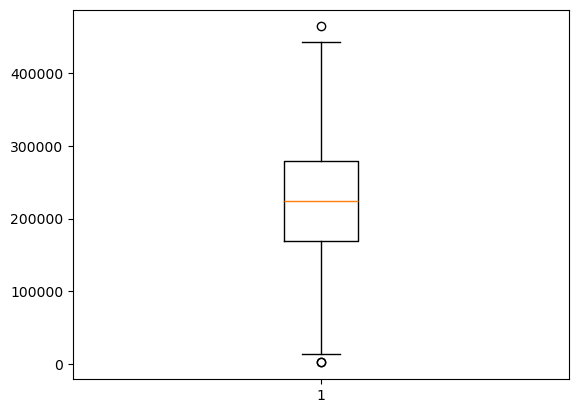

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(housing_df['Price'])
Q1 = housing_df['Price'].quantile(0.25)
Q3 = housing_df['Price'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
housing_df = housing_df[(housing_df['Price'] >= Q1 - 1.5*IQR) & (housing_df['Price'] <= Q3 + 1.5*IQR)]

In [7]:
import pandas as pd

# Assuming housing_df is your DataFrame with the features "SquareFeet, Bedrooms, Bathrooms, Neighborhood, YearBuilt, Price"

# Filter the DataFrame to include only 2-bedroom, 1-bathroom rural houses
one_bed_one_bath_rural_houses = housing_df[(housing_df['Bedrooms'] == 2) & (housing_df['Bathrooms'] == 1) & (housing_df['Neighborhood'] == 'Rural')]

# Compute the 5th percentile price for 2-bedroom, 1-bathroom houses
min_reasonable_price = one_bed_one_bath_rural_houses['Price'].quantile(0.05) * 0.85 #1b1b cheaper than 2b1b

print(f"Minimum Reasonable Price for 2-Bedroom, 1-Bathroom Houses: {min_reasonable_price}")

# Filter out houses with prices below the threshold
housing_df_filtered = housing_df[housing_df['Price'] >= min_reasonable_price]

# Check the result
display(housing_df_filtered.head())

Minimum Reasonable Price for 2-Bedroom, 1-Bathroom Houses: 72311.38713193996


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
33553,1894,5,1,Rural,1975,170835.035713
9427,1001,5,3,Suburb,1963,126913.469998
199,2264,4,3,Suburb,1964,246611.883092
12447,2299,5,1,Suburb,1999,244250.462969
39489,2651,2,1,Suburb,1951,271127.650112


In [8]:
housing_df = pd.get_dummies(housing_df, columns=['Neighborhood'], drop_first=True)
housing_df['Neighborhood_Suburb'] = housing_df['Neighborhood_Suburb'].astype(float)
housing_df['Neighborhood_Urban'] = housing_df['Neighborhood_Urban'].astype(float)
display(housing_df.head())

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Suburb,Neighborhood_Urban
33553,1894,5,1,1975,170835.035713,0.0,0.0
9427,1001,5,3,1963,126913.469998,1.0,0.0
199,2264,4,3,1964,246611.883092,1.0,0.0
12447,2299,5,1,1999,244250.462969,1.0,0.0
39489,2651,2,1,1951,271127.650112,1.0,0.0


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Reorder columns so that 'Price' is the last column
cols = [col for col in housing_df.columns if col != 'Price'] + ['Price']
cols_without_neighborhood = [col for col in cols if col not in ['Neighborhood_Suburb', 'Neighborhood_Urban']]

In [10]:
# remove the one-hot encoded columns from the scaler as no point in scaling them + causes issues in the solver

In [11]:
def custom_transform(pdf, fit = False):
    if fit:
        temp_pdf = scaler.fit_transform(pdf[cols_without_neighborhood])
    else:
        temp_pdf = scaler.transform(pdf[cols_without_neighborhood])
    temp_pdf_std = pd.DataFrame(temp_pdf, columns=cols_without_neighborhood)
    temp_pdf_std['Neighborhood_Suburb'] = pdf['Neighborhood_Suburb'].fillna(0)
    temp_pdf_std['Neighborhood_Urban'] = pdf['Neighborhood_Urban'].fillna(0)
    temp_pdf_std = temp_pdf_std[cols]
    return temp_pdf_std

In [12]:
def custom_untransform(pdf):
    temp_pdf = scaler.inverse_transform(pdf[cols_without_neighborhood])
    temp_pdf_std = pd.DataFrame(temp_pdf, columns=cols_without_neighborhood)
    temp_pdf_std['Neighborhood_Suburb'] = pdf['Neighborhood_Suburb'].fillna(0)
    temp_pdf_std['Neighborhood_Urban'] = pdf['Neighborhood_Urban'].fillna(0)
    temp_pdf_std = temp_pdf_std[cols]
    return temp_pdf_std

In [13]:
# scaling using custom transform and untransform to make it more uniform

housing_df = housing_df[cols]
housing_df.reset_index(drop=True, inplace=True)

# fit = True so that this transformation initializes the scaler
housing_df_std = custom_transform(housing_df, fit = True)

# Check the result
display(housing_df_std.head())


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Suburb,Neighborhood_Urban,Price
0,-0.190301,1.348678,-1.200975,-0.514774,0.0,0.0,-0.701578
1,-1.733627,1.348678,1.255073,-1.089016,1.0,0.0,-1.276468
2,0.449150,0.457883,1.255073,-1.041162,1.0,0.0,0.290265
3,0.509639,1.348678,-1.200975,0.633708,1.0,0.0,0.259356
4,1.117983,-1.323706,-1.200975,-1.663257,1.0,0.0,0.611152


In [14]:
print(housing_df_std.shape)

(4994, 7)


### Model Building and Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target
X_housing = housing_df_std.drop('Price', axis=1)  # Features
y_housing = housing_df_std['Price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=0)


In [16]:
# Initialize the model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_housing, y_train_housing)

# Make predictions on the test set
y_pred_housing = linear_reg_model.predict(X_test_housing)

# Calculate performance metrics
rmse = mean_squared_error(y_test_housing, y_pred_housing, squared=False)
r2 = r2_score(y_test_housing, y_pred_housing)

# Print out the RMSE and R-squared values
print(f"Model - RMSE: {rmse}")
print(f"Model - R² Score: {r2}")

Model - RMSE: 0.6501869551388749
Model - R² Score: 0.5673256081575899


c:\Users\chaud\anaconda3\envs\py_3.12\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


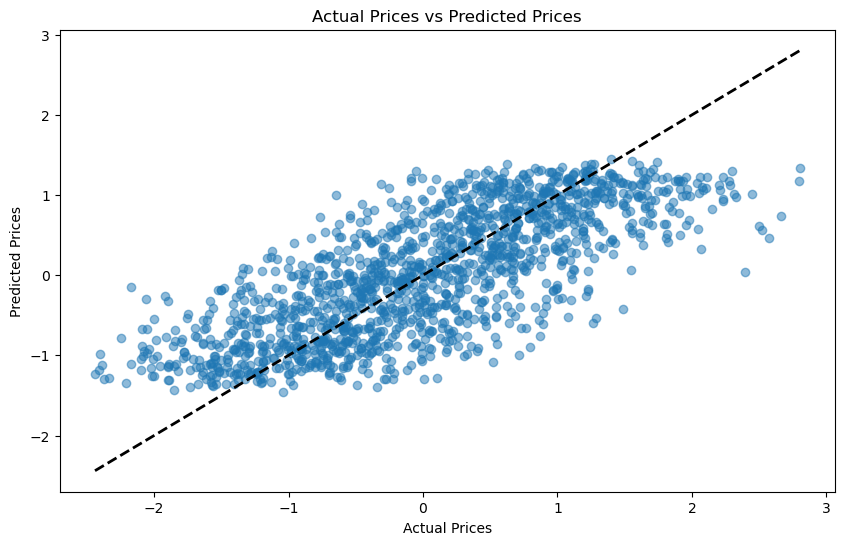

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_housing, y_pred_housing, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'k--', lw=2)
plt.show()

In [18]:
# new data point
new_data_point = {
    'SquareFeet': 2000,
    'Bedrooms': 3,
    'Bathrooms': 2,
    'YearBuilt': 1990,
    'Neighborhood_Suburb': 0,
    'Neighborhood_Urban': 1
}

new_data_df = pd.DataFrame([new_data_point])

new_data_df = new_data_df[X_housing.columns]

new_data_df['Price'] = 0

tdf = custom_transform(new_data_df)

tdf = tdf.drop(columns=['Price'])

predicted_price = linear_reg_model.predict(tdf)

print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: -0.019098826774103343


In [19]:
pred_data_df = tdf[pd.Index(cols).drop('Price')]
pred_data_df['Price'] = predicted_price

untransformed_point = custom_untransform(pred_data_df)

print(f"Untransformed Predicted Price: {untransformed_point}")


Untransformed Predicted Price:    SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood_Suburb  \
0      2000.0       3.0        2.0     1990.0                    0   

   Neighborhood_Urban          Price  
0                   1  222976.482589  


In [20]:
base_point = {
    'SquareFeet': 100,
    'Bedrooms': 1,
    'Bathrooms': 1,
    'YearBuilt': 1600,
    'Neighborhood_Suburb': 0,
    'Neighborhood_Urban': 0
}
base_data_df = pd.DataFrame([base_point])
base_data_df['Price'] = min_reasonable_price
base_values = custom_transform(base_data_df).iloc[0]
base_values

SquareFeet             -3.290779
Bedrooms               -2.214500
Bathrooms              -1.200975
YearBuilt             -18.459815
Neighborhood_Suburb     0.000000
Neighborhood_Urban      0.000000
Price                  -1.991155
Name: 0, dtype: float64

In [21]:
upper_point = {
    'SquareFeet': 100000,
    'Bedrooms': 100000,
    'Bathrooms': 100000,
    'YearBuilt': 2024,
    'Neighborhood_Suburb': 1,
    'Neighborhood_Urban': 1
}
upper_data_df = pd.DataFrame([upper_point])
upper_data_df['Price'] = 999999999
upper_values = custom_transform(upper_data_df).iloc[0]
upper_values

SquareFeet                169.361228
Bedrooms                89076.339450
Bathrooms              122799.965225
YearBuilt                   1.830044
Neighborhood_Suburb         1.000000
Neighborhood_Urban          1.000000
Price                   13086.066272
Name: 0, dtype: float64

In [22]:
delta_point = {
    'SquareFeet': 1,
    'Bedrooms': 1,
    'Bathrooms': 1,
    'YearBuilt': 1,
    'Neighborhood_Suburb': 1,
    'Neighborhood_Urban': 1
}
delta_data_df = pd.DataFrame([delta_point])
delta_data_df['Price'] = 1
delta_values = custom_transform(delta_data_df).iloc[0]
delta_values

SquareFeet             -3.461876
Bedrooms               -2.214500
Bathrooms              -1.200975
YearBuilt             -94.977468
Neighborhood_Suburb     1.000000
Neighborhood_Urban      1.000000
Price                  -2.937626
Name: 0, dtype: float64

In [23]:
def z3_to_solution(sqft, bd, ba, yb, ns, nu):

    pr = (
        coefficients[0] * sqft +
        coefficients[1] * bd +
        coefficients[2] * ba +
        coefficients[3] * yb +
        coefficients[4] * ns +
        coefficients[5] * nu +
        intercept
    )

    solution_df = pd.DataFrame([{
        'SquareFeet': sqft,
        'Bedrooms': bd,
        'Bathrooms': ba,
        'YearBuilt': yb,
        'Neighborhood_Suburb': ns,
        'Neighborhood_Urban': nu,
        'Price': pr
    }])

    solution_df = solution_df[cols]

    untransformed_solution = custom_untransform(solution_df)

    untransformed_solution_df = pd.DataFrame(untransformed_solution, columns=cols)

    return pr, untransformed_solution_df

In [24]:
def append_as_unique_ints(df, tdf):
    tdf = tdf.astype(int)
    row = tdf.iloc[0]
    
    # exclude the price column from the comparison
    columns_to_compare = df.columns[:-1]
    
    # if the row (excluding the price column) is unique in the DataFrame
    if not ((df[columns_to_compare] == row[columns_to_compare]).all(axis=1)).any():
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
        # df.to_csv('solutions.csv', index=False)
    
    return df

In [25]:
# Define the absolute value function
def z3_abs(x):
    return If(x >= 0, x, -x)

In [26]:
existing_solutions = pd.DataFrame(columns=cols)
iterations = 1
max_iterations = 1000
delta = 0.1

from z3 import *

solver = Solver()

solver.set("timeout", 1000)

squarefeet_z3 = Real('squarefeet')
bedrooms_z2 = Real('bedrooms')
bathrooms_z3 = Real('bathrooms')
yearbuilt_z3 = Real('yearbuilt')
nbsuburban_z3 = Real('nbsuburban')
nburban_z3 = Real('nburban')

coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

prediction =    (coefficients[0] * squarefeet_z3 +
                coefficients[1] * bedrooms_z2 +
                coefficients[2] * bathrooms_z3 +
                coefficients[3] * yearbuilt_z3 +
                coefficients[4] * nbsuburban_z3 +
                coefficients[5] * nburban_z3 +
                intercept)

solver.add(squarefeet_z3 >= base_values['SquareFeet'])
solver.add(bedrooms_z2 >= base_values['Bedrooms'])
solver.add(bathrooms_z3 >= base_values['Bathrooms'])
solver.add(yearbuilt_z3 >= base_values['YearBuilt'], yearbuilt_z3 <= upper_values['YearBuilt'])
solver.add(Or(
    And(nbsuburban_z3 == 1.0, nburban_z3 == 0.0),
    And(nbsuburban_z3 == 0.0, nburban_z3 == 1.0),
    And(nbsuburban_z3 == 0.0, nburban_z3 == 0.0)
))

solver.add(prediction < base_values['Price'])

while ((solver.check() == sat) and (iterations <= max_iterations)):
    model = solver.model()
    sqft_val = float(model[squarefeet_z3].as_decimal(10).rstrip('?'))
    bd_val = float(model[bedrooms_z2].as_decimal(10).rstrip('?'))
    ba_val = float(model[bathrooms_z3].as_decimal(10).rstrip('?'))
    yb_val = float(model[yearbuilt_z3].as_decimal(10).rstrip('?'))
    ns_val = float(model[nbsuburban_z3].as_decimal(10).rstrip('?'))
    nu_val = float(model[nburban_z3].as_decimal(10).rstrip('?'))
    pr_val, solution = z3_to_solution(sqft_val, bd_val, ba_val, yb_val, ns_val, nu_val)
    existing_solutions = append_as_unique_ints(existing_solutions, solution)
    # print(f"Iteration {iterations}: Solution found: {solution}")
    
    # constraint that the new point should have a total Euclidean distance greater than delta from the solution just found
    solver.add(Or(
        z3_abs(squarefeet_z3 - sqft_val) > delta,
        z3_abs(bedrooms_z2 - bd_val) > delta,
        z3_abs(bathrooms_z3 - ba_val) > delta,
        z3_abs(yearbuilt_z3 - yb_val) > delta,
        z3_abs(nbsuburban_z3 - ns_val) > delta,
        z3_abs(nburban_z3 - nu_val) > delta,
        z3_abs(prediction - pr_val) > delta
    ))
    
    if solver.check() != sat:
        break
    iterations += 1
               
print(f"Total iterations: {iterations-1}")
print("Solver state: ", solver.check())

Total iterations: 139
Solver state:  sat


In [27]:
coefficients

array([ 0.76855291,  0.07502777,  0.02033053, -0.00564798,  0.01674646,
        0.03814738])

In [28]:
intercept

-0.0187068670770409

In [29]:
existing_solutions

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Suburb,Neighborhood_Urban,Price
0,100,3,1,1985,0,1,32694
1,500,1,1,2023,1,0,56323
2,100,4,2,1970,1,0,35611
3,421,3,2,1989,1,0,65046
4,100,4,1,1998,1,0,33634
...,...,...,...,...,...,...,...
117,411,3,1,1607,0,1,72293
118,408,3,1,1613,0,1,72015
119,408,3,1,1611,0,1,72213
120,410,3,1,1611,0,1,72309


In [30]:
new_points = existing_solutions
lamb = 1
new_points['Price'] = (1 - lamb) * new_points['Price'] + lamb * min_reasonable_price

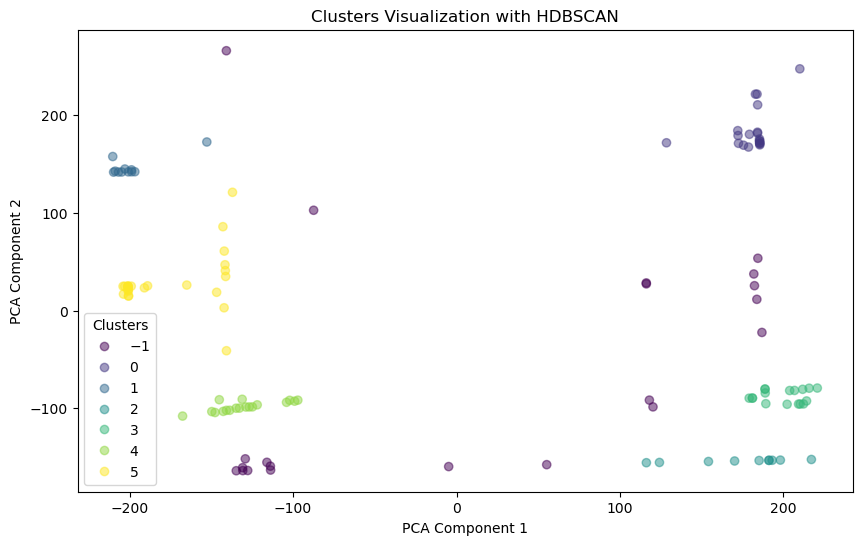

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import hdbscan

# Assuming new_points is your DataFrame with features and a price column
# Exclude the price column for clustering
features = new_points.drop(columns=['Price'])

# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1)
new_points['cluster'] = clusterer.fit_predict(features)

# Sample points from each cluster
sampled_points_list = []

# Define the number of points to sample from each cluster
points_per_cluster = 10

for cluster in new_points['cluster'].unique():
    cluster_points = new_points[new_points['cluster'] == cluster]
    # Sample a fixed number of points from each cluster or all points if fewer than desired
    sample_size = min(points_per_cluster, len(cluster_points))
    sampled_points_list.append(cluster_points.sample(n=sample_size, random_state=42))

# Concatenate the sampled points into a single DataFrame
sampled_points = pd.concat(sampled_points_list, ignore_index=True)

# Drop the cluster column
sampled_points = sampled_points.drop(columns=['cluster'])

# Save the sampled points to a new DataFrame
sampled_points.to_csv('sampled_points.csv', index=False)

# Visualize the clusters
# If you have more than two features, use PCA to reduce to two dimensions
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=new_points['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization with HDBSCAN')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [32]:
# sampled_points = new_points

In [33]:
sampled_points_std = custom_transform(sampled_points, fit=False)

# Split the data into features and target
X_sampled_points = sampled_points_std.drop('Price', axis=1)  # Features
y_sampled_points = sampled_points_std['Price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train_sampled_points, X_test_sampled_points, y_train_sampled_points, y_test_sampled_points = train_test_split(
    X_sampled_points, y_sampled_points, test_size=0.3, random_state=0)

C:\Users\chaud\AppData\Local\Temp\ipykernel_27716\2170052054.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_pdf_std['Neighborhood_Suburb'] = pdf['Neighborhood_Suburb'].fillna(0)
C:\Users\chaud\AppData\Local\Temp\ipykernel_27716\2170052054.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_pdf_std['Neighborhood_Urban'] = pdf['Neighborhood_Urban'].fillna(0)


In [34]:
# Combine the training datasets
X_train_combined = pd.concat([X_train_housing, X_train_sampled_points], ignore_index=True)
y_train_combined = pd.concat([y_train_housing, y_train_sampled_points], ignore_index=True)

# Combine the testing datasets
X_test_combined = pd.concat([X_test_housing, X_test_sampled_points], ignore_index=True)
y_test_combined = pd.concat([y_test_housing, y_test_sampled_points], ignore_index=True)

# Check the result
print(f"Combined Training Set Shape: {X_train_combined.shape}")
print(f"Combined Testing Set Shape: {X_test_combined.shape}")

# Assign weights
weights_train = np.ones(len(X_train_combined))
weights_train[-len(X_train_sampled_points):] = 1000  # Assign higher weight to the sampled points

Combined Training Set Shape: (3544, 6)
Combined Testing Set Shape: (1520, 6)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
weighted_reg_model = LinearRegression()

# Train the model with weights
weighted_reg_model.fit(X_train_combined, y_train_combined, sample_weight=weights_train)

# Make predictions on the test set
y_pred_combined = weighted_reg_model.predict(X_test_combined)

# Calculate performance metrics
rmse_combined = mean_squared_error(y_test_combined, y_pred_combined, squared=False)
r2_combined = r2_score(y_test_combined, y_pred_combined)

# Print out the RMSE and R-squared values
print(f"Weighted Model - RMSE: {rmse_combined}")
print(f"Weighted Model - R² Score: {r2_combined}")

Weighted Model - RMSE: 0.6665255128635609
Weighted Model - R² Score: 0.5637583594405711


c:\Users\chaud\anaconda3\envs\py_3.12\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
y_pred_weighted_sampled_points = weighted_reg_model.predict(X_test_sampled_points)

# Calculate performance metrics for the sampled points in the test set
rmse_sampled_points = mean_squared_error(y_test_sampled_points, y_pred_weighted_sampled_points, squared=False)
r2_sampled_points = r2_score(y_test_sampled_points, y_pred_weighted_sampled_points)

# Print out the RMSE and R-squared values for the sampled points in the test set
print(f"Performance of Auto-Corrected Model on Sampled Points - RMSE: {rmse_sampled_points}")
print(f"Performance of Auto-Corrected Model on Sampled Points - R² Score: {r2_sampled_points}")

Performance of Auto-Corrected Model on Sampled Points - RMSE: 0.1072238909857636
Performance of Auto-Corrected Model on Sampled Points - R² Score: -5.829652716738884e+28


c:\Users\chaud\anaconda3\envs\py_3.12\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
y_pred_normal_sampled_points = linear_reg_model.predict(X_test_sampled_points)

# Calculate performance metrics for the sampled points in the test set
rmse_normal_sampled_points = mean_squared_error(y_test_sampled_points, y_pred_normal_sampled_points, squared=False)
r2_normal_sampled_points = r2_score(y_test_sampled_points, y_pred_normal_sampled_points)

# Print out the RMSE and R-squared values for the sampled points in the test set
print(f"Performance of Normal Model on Sampled Points - RMSE: {rmse_normal_sampled_points}")
print(f"Performance of Normal Model on Sampled Points - R² Score: {r2_normal_sampled_points}")

Performance of Normal Model on Sampled Points - RMSE: 0.30052427091519723
Performance of Normal Model on Sampled Points - R² Score: -4.579506314046973e+29


c:\Users\chaud\anaconda3\envs\py_3.12\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


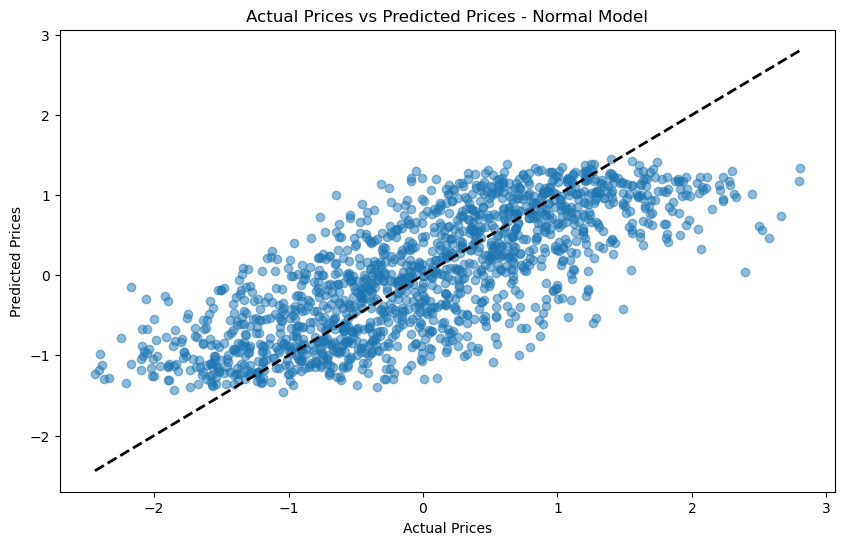

In [38]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_housing, y_pred_housing, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices - Normal Model')
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'k--', lw=2)
plt.show()

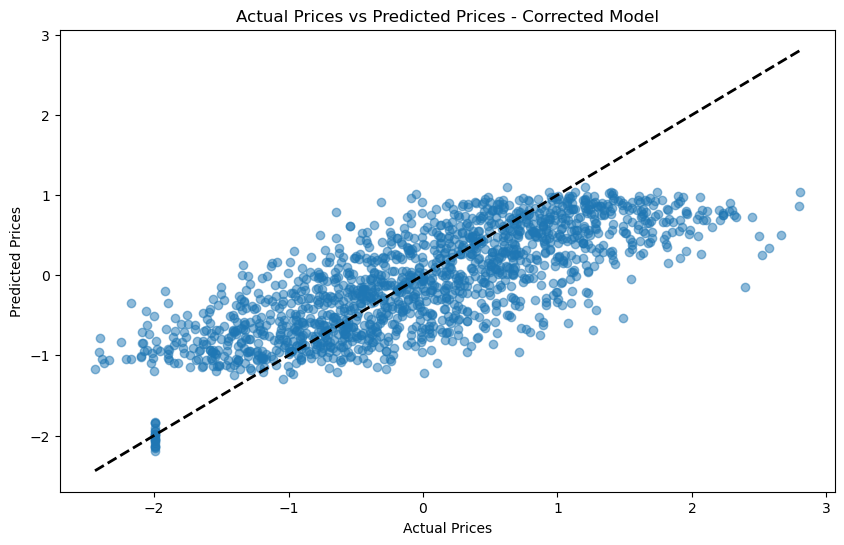

In [39]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_combined, y_pred_combined, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices - Corrected Model')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'k--', lw=2)
plt.show()

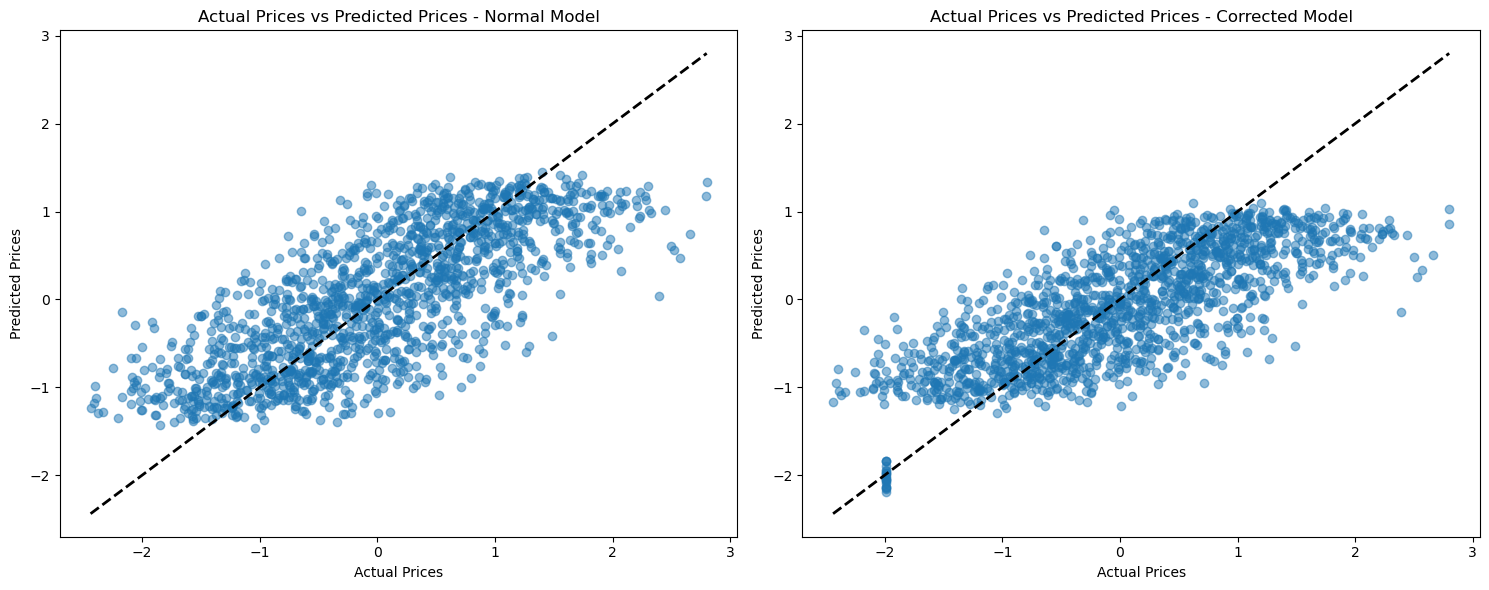

In [40]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for the normal model
axes[0].scatter(y_test_housing, y_pred_housing, alpha=0.5)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Actual Prices vs Predicted Prices - Normal Model')
axes[0].plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'k--', lw=2)

# Scatter plot for the corrected model
axes[1].scatter(y_test_combined, y_pred_combined, alpha=0.5)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Actual Prices vs Predicted Prices - Corrected Model')
axes[1].plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'k--', lw=2)

# Adjust layout
plt.tight_layout()
plt.show()

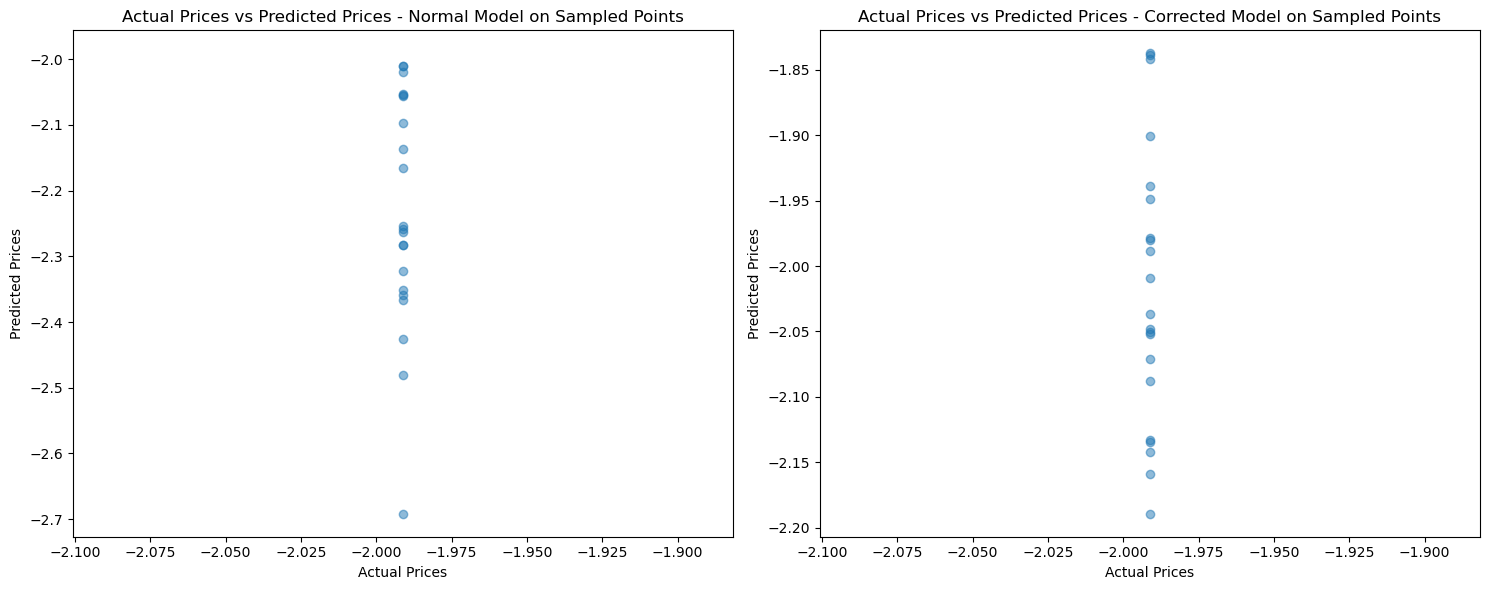

In [41]:
# Create a figure with two subplots for the sampled points
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for the normal model on sampled points
axes[0].scatter(y_test_sampled_points, y_pred_normal_sampled_points, alpha=0.5)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Actual Prices vs Predicted Prices - Normal Model on Sampled Points')
axes[0].plot([y_test_sampled_points.min(), y_test_sampled_points.max()], [y_test_sampled_points.min(), y_test_sampled_points.max()], 'k--', lw=2)

# Scatter plot for the corrected model on sampled points
axes[1].scatter(y_test_sampled_points, y_pred_weighted_sampled_points, alpha=0.5)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Actual Prices vs Predicted Prices - Corrected Model on Sampled Points')
axes[1].plot([y_test_sampled_points.min(), y_test_sampled_points.max()], [y_test_sampled_points.min(), y_test_sampled_points.max()], 'k--', lw=2)

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Fixed x-positions for the two models
x_normal = 0
x_corrected = 1

# Add scatter plots with enhanced styling
fig.add_trace(
    go.Scatter(
        x=[x_normal]*len(y_pred_normal_sampled_points),
        y=y_pred_normal_sampled_points,
        mode='markers',
        name='Normal Model',
        marker=dict(
            size=10,
            color='royalblue',
            symbol='circle',
            line=dict(color='darkblue', width=1)
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=[x_corrected]*len(y_pred_weighted_sampled_points),
        y=y_pred_weighted_sampled_points,
        mode='markers',
        name='Corrected Model',
        marker=dict(
            size=10,
            color='mediumseagreen',
            symbol='circle',
            line=dict(color='darkgreen', width=1)
        )
    )
)

# Convert numpy arrays to pandas Series
y_pred_normal_sampled_points_series = pd.Series(y_pred_normal_sampled_points)
y_pred_weighted_sampled_points_series = pd.Series(y_pred_weighted_sampled_points)

# Add arrows between corresponding points with gradient color
for i in range(len(y_pred_normal_sampled_points_series)):
    fig.add_shape(
        type="path",
        path=f"M {x_normal},{y_pred_normal_sampled_points_series.iloc[i]} L {x_corrected},{y_pred_weighted_sampled_points_series.iloc[i]}",
        line=dict(
            color="rgba(255,0,0,0.3)",
            width=2,
        ),
        layer='below'
    )

# Update layout with better styling and legend at bottom right
fig.update_layout(
    title=dict(
        text='Prediction Shifts For Corrective Points: Normal → Corrected Model',
        x=0.5,
        font=dict(size=20)
    ),
    xaxis=dict(
        ticktext=['Normal Model', 'Corrected Model'],
        tickvals=[x_normal, x_corrected],
        title='Model Type',
        range=[-0.2, 1.2],
        showgrid=False
    ),
    yaxis=dict(
        title='Predicted Prices',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    height=700,
    width=900,
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        yanchor="bottom",
        y=0.01,
        xanchor="right",
        x=0.99
    )
)

fig.show()

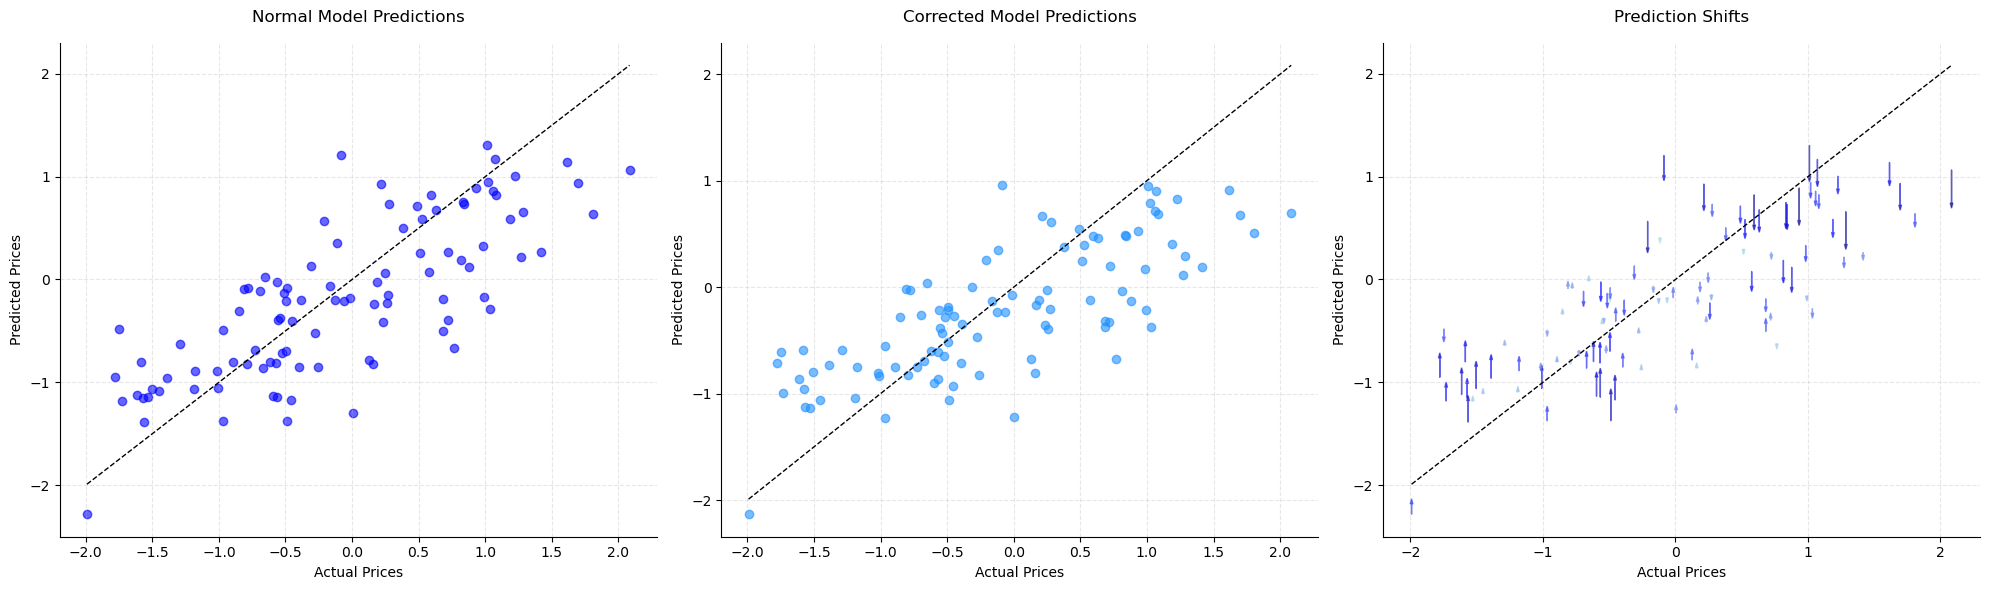

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

# Sample 100 random indices from test dataset
sample_indices = np.random.choice(len(y_test_combined), size=100, replace=False)

# Get corresponding actual values and predictions
y_test_sample = y_test_combined.iloc[sample_indices]
X_test_sample = X_test_combined.iloc[sample_indices]

# Get predictions from both models
y_pred_normal = pd.Series(linear_reg_model.predict(X_test_sample))
y_pred_corrected = pd.Series(weighted_reg_model.predict(X_test_sample))

# Create figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Color scheme
colors = ['#4B0082', '#0000FF', '#1E90FF']  # Dark to light blue

# Scatter plot for normal model
axes[0].scatter(y_test_sample, y_pred_normal, alpha=0.6, c=colors[1])
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Normal Model Predictions', pad=15)
axes[0].plot([y_test_sample.min(), y_test_sample.max()], 
             [y_test_sample.min(), y_test_sample.max()], 'k--', lw=1)

# Scatter plot for corrected model
axes[1].scatter(y_test_sample, y_pred_corrected, alpha=0.6, c=colors[2])
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Corrected Model Predictions', pad=15)
axes[1].plot([y_test_sample.min(), y_test_sample.max()],
             [y_test_sample.min(), y_test_sample.max()], 'k--', lw=1)

# Arrow plot showing shifts
axes[2].set_xlabel('Actual Prices')
axes[2].set_ylabel('Predicted Prices')
axes[2].set_title('Prediction Shifts', pad=15)
axes[2].plot([y_test_sample.min(), y_test_sample.max()],
             [y_test_sample.min(), y_test_sample.max()], 'k--', lw=1)

# Calculate shift magnitudes for coloring
shifts = abs(y_pred_corrected - y_pred_normal)
norm = plt.Normalize(shifts.min(), shifts.max())
cmap = LinearSegmentedColormap.from_list("", ["lightblue", "blue", "darkblue"])

# Add arrows with gradient colors
for i in range(len(y_test_sample)):
    color = cmap(norm(shifts.iloc[i]))
    axes[2].arrow(y_test_sample.iloc[i], y_pred_normal.iloc[i],
                 0, y_pred_corrected.iloc[i] - y_pred_normal.iloc[i],
                 head_width=0.02, head_length=0.05, 
                 fc=color, ec=color, alpha=0.6,
                 length_includes_head=True)

# Style improvements
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()